In [8]:
import mido
import collections
import pipe21 as P
from musictool.note import SpecificNote
from musictool.noteset import NoteSet
from musictool.voice_leading.checks import find_paused_voices
from mido.messages import BaseMessage
import random
import itertools

In [12]:
# track = mido.MidiFile('/Users/tandav/Desktop/harmony-2voice.mid').tracks[0]
track = mido.MidiFile('/Users/tandav/Desktop/harmony.mid').tracks[0]
track

MidiTrack([
  MetaMessage('track_name', name='\x00', time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=36, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=36, notated_32nd_notes_per_beat=8, time=0),
  Message('note_on', channel=0, note=33, velocity=100, time=0),
  Message('note_on', channel=0, note=57, velocity=100, time=0),
  Message('note_on', channel=0, note=60, velocity=100, time=0),
  Message('note_off', channel=0, note=57, velocity=64, time=96),
  Message('note_on', channel=0, note=57, velocity=100, time=0),
  Message('note_on', channel=0, note=59, velocity=100, time=0),
  Message('note_off', channel=0, note=60, velocity=64, time=0),
  Message('note_off', channel=0, note=33, velocity=64, time=96),
  Message('note_on', channel=0, note=40, velocity=100, time=0),
  Message('note_on', channel=0, note=55, velocity=100, time=0),
  Message('note_off', channel=0, note=57, velocity=64,

In [13]:
n_notes = 3
timeline = []
playing = set()

def exec_message(message: BaseMessage) -> None:
    if message.type == 'note_on':
        playing.add(SpecificNote.from_absolute_i(message.note - 12))
    elif message.type == 'note_off':
        playing.remove(SpecificNote.from_absolute_i(message.note - 12))

def handle_timestamp():
    x = list(playing)
#     if len(x) < n_notes:
#         x += random.sample(x, n_notes - len(x))
#     print(x)
    x = sorted(x)
    timeline.append(x)
        
buffer = []

for message in track:
    if message.type not in {'note_on', 'note_off'}:
        continue
    if message.time == 0:
        buffer.append(message)
    elif buffer:
        for message_b in buffer:
            exec_message(message_b)
        buffer = []
        print(playing)
        handle_timestamp()
        
        exec_message(message)
    else:
        exec_message(message)
        handle_timestamp()
        print(playing)

{A1, C4, A3}
{A1, A3, B3}
{A3, E2, G3}
{E2, G3, E3}
{C3, A1, E3}
{D3, A1, G3}
{C3, A1, E3}
{A1, C4, G3}
{A3, B3, A1}
{A3, E2, G3}
{E2, G3, E3}
{C3, A1, E3}
{D3, A1, G3}
{C3, A1, E3}
{D3, A1, E3}
{F3, D3, D2}
{D3, G3, D2}
{F3, A3, D2}
{A3, B3, D2}
{E2, B3, G3}
{E2, G3, E3}
{A3, E2, D3}
{E2, B3, E3}
{E4, G4, G2}
{E4, G4, E2}
{F2, D4, F4}
{D4, F4, D2}
{C4, E4, C2}
{C4, B1, E4}
{A1, C4, A3}


# matplotlib static MVP

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# n_notes = 2
# assert all(len(c) <= n_notes for c in timeline)
# for a, b in itertools.pairwise(timeline):
#     if len(a) 
#     print(a, b)

In [16]:
for notes in timeline:
    print(notes)

[A1, A3, C4]
[A1, A3, B3]
[E2, G3, A3]
[E2, E3, G3]
[A1, C3, E3]
[A1, D3, G3]
[A1, C3, E3]
[A1, G3, C4]
[A1, A3, B3]
[E2, G3, A3]
[E2, E3, G3]
[A1, C3, E3]
[A1, D3, G3]
[A1, C3, E3]
[A1, D3, E3]
[D2, D3, F3]
[D2, D3, G3]
[D2, F3, A3]
[D2, A3, B3]
[E2, G3, B3]
[E2, E3, G3]
[E2, D3, A3]
[E2, E3, B3]
[G2, E4, G4]
[E2, E4, G4]
[F2, D4, F4]
[D2, D4, F4]
[C2, C4, E4]
[B1, C4, E4]
[A1, A3, C4]


In [5]:
timeline

[[A3, C4],
 [A3, B3],
 [G3, A3],
 [E3, G3],
 [C3, E3],
 [D3, G3],
 [C3, E3],
 [G3, C4],
 [A3, B3],
 [G3, A3],
 [E3, G3],
 [C3, E3],
 [D3, G3],
 [C3, E3],
 [E3],
 [D3, F3],
 [D3, G3],
 [F3, A3],
 [A3, B3],
 [G3, B3],
 [E3, G3],
 [D3, A3],
 [E3, B3],
 [E4, G4],
 [D4, F4],
 [C4, E4],
 [A3, C4]]

array([0.        , 0.00384615, 0.00769231, 0.01153846, 0.01538462,
       0.01923077, 0.02307692, 0.02692308, 0.03076923, 0.03461538,
       0.03846154, 0.04230769, 0.04615385, 0.05      , 0.05384615,
       0.05769231, 0.06153846, 0.06538462, 0.06923077, 0.07307692,
       0.07692308, 0.08076923, 0.08461538, 0.08846154, 0.09230769,
       0.09615385, 0.1       ])

In [153]:
x

array([5, 5, 4, 2, 0, 1, 0, 4, 5, 4, 2, 0, 1, 0, 2, 1, 1, 3, 5, 4, 2, 1,
       2, 8, 7, 6, 5])

In [189]:
from musictool.noteset import NoteRange
from musictool.note import SpecificNote
from musictool.scale import Scale
from musictool.chord import SpecificChord



scale = Scale.from_name('C', 'major')
# noterange = NoteRange('C0', 'C3', noteset=scale)
noterange = NoteRange('C0', 'C3')
print(list(noterange))

[C0, d0, D0, e0, E0, F0, f0, G0, a0, A0, b0, B0, C1, d1, D1, e1, E1, F1, f1, G1, a1, A1, b1, B1, C2, d2, D2, e2, E2, F2, f2, G2, a2, A2, b2, B2, C3]


In [187]:
noterange

NoteRange(C0, C3, noteset=CdDeEFfGaAbB)

In [211]:
SpecificChord(frozenset({row_note, col_note}))

C3

In [216]:
lines = []
for row_note in noterange:
    lines.append('<tr>')
    for col_note in noterange:
        chord = SpecificChord(frozenset({row_note, col_note}))
        lines.append(f"    <td><a href='/play_chord/{chord}'>{col_note}</a></td>")
    lines.append('</tr>')
table_data = '\n'.join(lines)
print(table_data)

<tr>
    <td><a href='/play_chord/C0'>C0</a></td>
    <td><a href='/play_chord/C0_d0'>d0</a></td>
    <td><a href='/play_chord/C0_D0'>D0</a></td>
    <td><a href='/play_chord/C0_e0'>e0</a></td>
    <td><a href='/play_chord/C0_E0'>E0</a></td>
    <td><a href='/play_chord/C0_F0'>F0</a></td>
    <td><a href='/play_chord/C0_f0'>f0</a></td>
    <td><a href='/play_chord/C0_G0'>G0</a></td>
    <td><a href='/play_chord/C0_a0'>a0</a></td>
    <td><a href='/play_chord/C0_A0'>A0</a></td>
    <td><a href='/play_chord/C0_b0'>b0</a></td>
    <td><a href='/play_chord/C0_B0'>B0</a></td>
    <td><a href='/play_chord/C0_C1'>C1</a></td>
    <td><a href='/play_chord/C0_d1'>d1</a></td>
    <td><a href='/play_chord/C0_D1'>D1</a></td>
    <td><a href='/play_chord/C0_e1'>e1</a></td>
    <td><a href='/play_chord/C0_E1'>E1</a></td>
    <td><a href='/play_chord/C0_F1'>F1</a></td>
    <td><a href='/play_chord/C0_f1'>f1</a></td>
    <td><a href='/play_chord/C0_G1'>G1</a></td>
    <td><a href='/play_chord/C0_a1'>a1

frozenset({C0})

In [ ]:
SpecificChord(fr)

In [217]:
SpecificChord.from_str('C1')

C1

In [172]:
import itertools

In [ ]:
0, 2, 2

In [186]:
list(itertools.combinations_with_replacement(range(5), r=2))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)]

In [218]:
list(itertools.product(range(5), repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

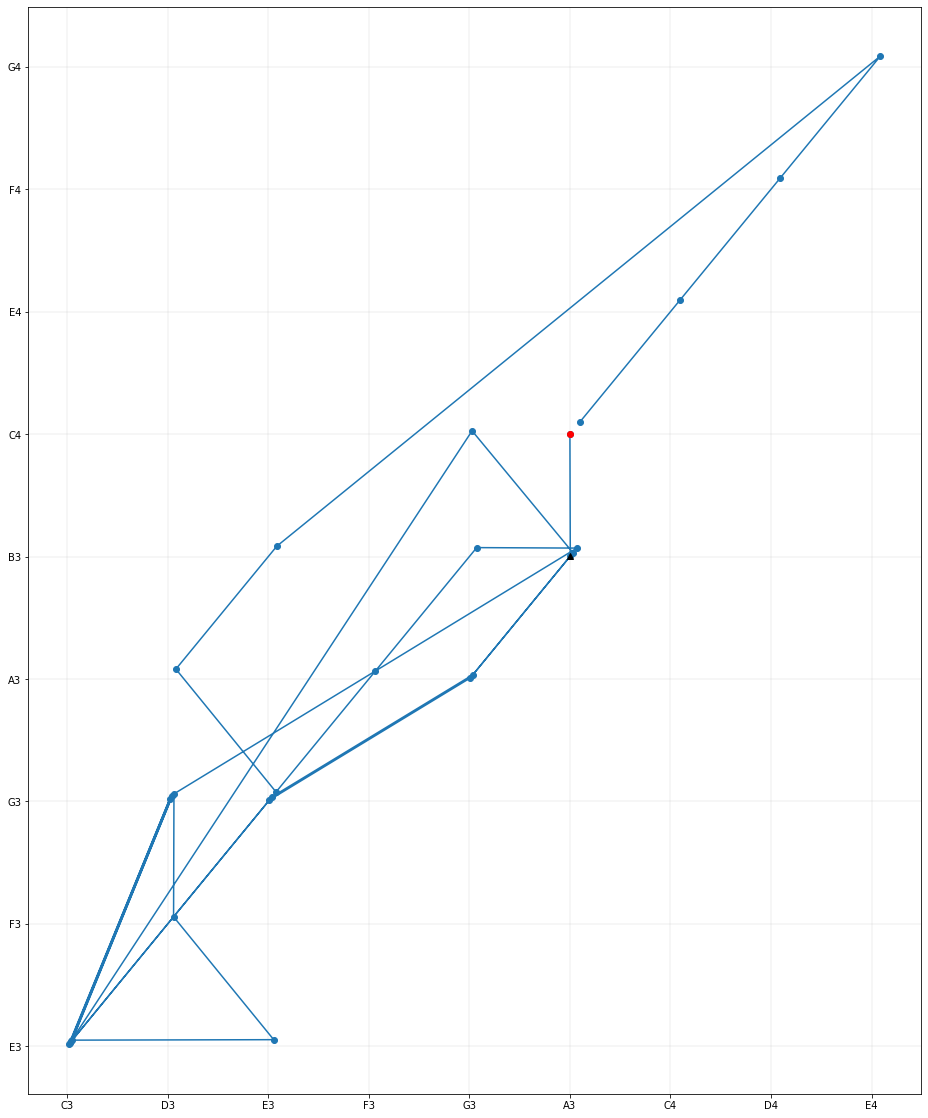

In [160]:
x, y = list(zip(*timeline))

xlabels = x | P.Pipe(set) | P.Pipe(sorted) | P.Map(str) | P.Pipe(list)
ylabels = y | P.Pipe(set) | P.Pipe(sorted) | P.Map(str) | P.Pipe(list)
xticks = range(len(xlabels))
yticks = range(len(ylabels))

x = [xlabels.index(str(q)) for q in x]
y = [ylabels.index(str(q)) for q in y]

x = np.array(x) + np.linspace(0, 0.1, len(x))
y = np.array(y) + np.linspace(0, 0.1, len(y))

fig, ax = plt.subplots(figsize=(16, 20))
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.plot(x, y, 'o-')
ax.plot(x[0], y[0], 'ro-')
ax.plot(x[1], y[1], 'k^-')
plt.grid(lw=0.2)

In [129]:
xlabels, ylabels

(['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'C4', 'D4', 'E4'],
 ['E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'E4', 'F4', 'G4'])

In [130]:
xticks, yticks

(range(0, 9), range(0, 9))

In [101]:
xticks, yticks, xlabels, ylabels = [], [], [], []
X, Y = [], []

for i, (x, y) in enumerate(timeline):
    X.append()
#     xticks.append(i)
#     yticks.append(i)
#     xlabels.append(str(x))
#     ylabels.append(str(y))

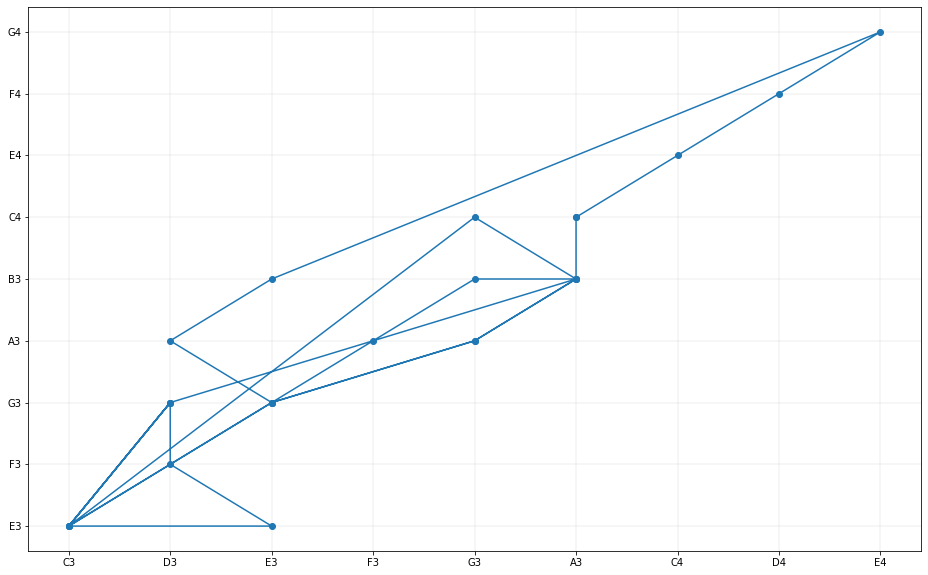

In [139]:
# x, y = list(zip(*timeline))
# x = list(map(str, x))
# y = list(map(str, y))

# plt.figure(figsize=(16, 10))
fig, ax = plt.subplots(figsize=(16, 10))

# ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
plt.grid(lw=0.2)
ax.plot(x, y, 'o-')


TypeError: float() argument must be a string or a real number, not 'SpecificNote'

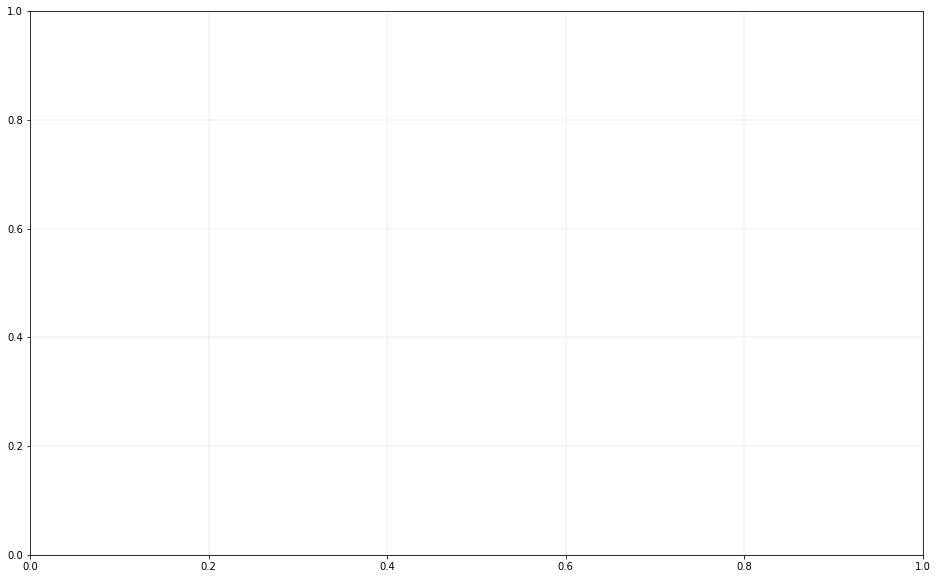

In [87]:
# x = list(map(str, x))
# y = list(map(str, y))

plt.figure(figsize=(16, 10))
plt.grid(lw=0.2)
plt.plot(x, y, 'o-')

In [ ]:
list(map(tuple, zip(*timeline)))

In [ ]:
list(timeline)

# garbage

In [37]:
track_grouped = (
    track
    | P.GroupBy(lambda x: x.time == 0)
    | P.Values()
    | P.Map(list)
    | P.Pipe(list)
)